In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import scipy
# import sklearn
import numpy as np


In [8]:
# Mapeo de tickers a nombres descriptivos
ticker_names = {
    'XLE': 'XLE: Energía',
    'XLB': 'XLB: Materiales',
    'XLI': 'XLI: Industriales', 
    'XLK': 'XLK: Tecnología',
    'XLF': 'XLF: Financiero',
    'XLP': 'XLP: Consumo Básico',
    'XLY': 'XLY: Consumo Discrecional',
    'XLV': 'XLV: Salud',
    'XLU': 'XLU: Utilidades',
    'IYR': 'IYR: Bienes Raíces',
    'VOX': 'VOX: Servicios de Comunicación',
    'SPY': 'SPY: S&P 500'
}
fechas_ciclos_pico_valle = [
    ('1990/07/06', '1991/03/01'),
    ('2001/03/01', '2001/11/01'), 
    ('2007/12/01', '2009/06/01'),
    ('2020/02/01', '2020/04/01')
]

In [9]:
import yfinance as yf
ticker_list = ['XLE', 'XLB', 'XLI', 'XLK', 'XLF', 
               'XLP', 'XLY', 'XLV', 'XLU', 'IYR', 'VOX', 'SPY']
 
# Here we use yf.download function
df = yf.download(
     
    # passes the ticker
    tickers=ticker_list,
     
    # used for access data[ticker]
    group_by='ticker',
    period='1d',
    start='2004-06-01',
 
)

# df = df[df.index.get_level_values('Date') >= '2004-01-01']

df = df.resample('W').last()
df.index = df.index.tz_localize(None)
df = df.stack(-2)


df.reset_index(inplace=True)
# Reemplazar los tickers con sus nombres descriptivos
df["Nombre"] = df.Ticker.map(ticker_names)
df.set_index(["Date","Ticker"], inplace=True)



[*********************100%***********************]  12 of 12 completed
/tmp/ipykernel_492237/964942650.py:22: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df = df.stack(-2)


In [10]:
# df.reset_index(inplace=True)

In [11]:
df

Price                    Open        High         Low       Close   Adj Close  \
Date       Ticker                                                               
2004-06-06 IYR      49.849998   50.189999   49.505001   49.750000   22.961111   
           SPY     112.980003  113.580002  112.709999  112.980003   76.607155   
           XLB      25.299999   25.500000   25.219999   25.360001   16.172010   
           XLE      29.799999   29.840000   29.540001   29.680000   16.843908   
           XLF      23.436232   23.436232   23.208773   23.265638   15.296842   
...                       ...         ...         ...         ...         ...   
2024-12-15 XLK     240.179993  241.119995  237.149994  239.050003  239.050003   
           XLP      82.089996   82.519997   81.629997   82.040001   82.040001   
           XLU      77.699997   78.050003   77.510002   77.639999   77.639999   
           XLV     140.830002  141.449997  140.130005  140.990005  140.990005   
           XLY     234.490005  235.589996  233.899994  235.490005  235.490005   

Price                  Volume                     Nombre  
Date       Ticker                                         
2004-06-06 IYR       620400.0         IYR: Bienes Raíces  
           SPY     32739500.0               SPY: S&P 500  
           XLB       388900.0            XLB: Materiales  
           XLE       940900.0               XLE: Energía  
           XLF      4605910.0            XLF: Financiero  
...                       ...                        ...  
2024-12-15 XLK      4338000.0            XLK: Tecnología  
           XLP      8154300.0        XLP: Consumo Básico  
           XLU      6904200.0            XLU: Utilidades  
           XLV      7598400.0                 XLV: Salud  
           XLY      2691200.0  XLY: Consumo Discrecional  

[12847 rows x 7 columns]

In [12]:
df.groupby("Ticker").agg({"min","max"})["Date"]["min"].max()

KeyError: 'Date'

In [13]:
df

Price                    Open        High         Low       Close   Adj Close  \
Date       Ticker                                                               
2004-06-06 IYR      49.849998   50.189999   49.505001   49.750000   22.961111   
           SPY     112.980003  113.580002  112.709999  112.980003   76.607155   
           XLB      25.299999   25.500000   25.219999   25.360001   16.172010   
           XLE      29.799999   29.840000   29.540001   29.680000   16.843908   
           XLF      23.436232   23.436232   23.208773   23.265638   15.296842   
...                       ...         ...         ...         ...         ...   
2024-12-15 XLK     240.179993  241.119995  237.149994  239.050003  239.050003   
           XLP      82.089996   82.519997   81.629997   82.040001   82.040001   
           XLU      77.699997   78.050003   77.510002   77.639999   77.639999   
           XLV     140.830002  141.449997  140.130005  140.990005  140.990005   
           XLY     234.490005  235.589996  233.899994  235.490005  235.490005   

Price                  Volume                     Nombre  
Date       Ticker                                         
2004-06-06 IYR       620400.0         IYR: Bienes Raíces  
           SPY     32739500.0               SPY: S&P 500  
           XLB       388900.0            XLB: Materiales  
           XLE       940900.0               XLE: Energía  
           XLF      4605910.0            XLF: Financiero  
...                       ...                        ...  
2024-12-15 XLK      4338000.0            XLK: Tecnología  
           XLP      8154300.0        XLP: Consumo Básico  
           XLU      6904200.0            XLU: Utilidades  
           XLV      7598400.0                 XLV: Salud  
           XLY      2691200.0  XLY: Consumo Discrecional  

[12847 rows x 7 columns]

In [14]:
df

Price                    Open        High         Low       Close   Adj Close  \
Date       Ticker                                                               
2004-06-06 IYR      49.849998   50.189999   49.505001   49.750000   22.961111   
           SPY     112.980003  113.580002  112.709999  112.980003   76.607155   
           XLB      25.299999   25.500000   25.219999   25.360001   16.172010   
           XLE      29.799999   29.840000   29.540001   29.680000   16.843908   
           XLF      23.436232   23.436232   23.208773   23.265638   15.296842   
...                       ...         ...         ...         ...         ...   
2024-12-15 XLK     240.179993  241.119995  237.149994  239.050003  239.050003   
           XLP      82.089996   82.519997   81.629997   82.040001   82.040001   
           XLU      77.699997   78.050003   77.510002   77.639999   77.639999   
           XLV     140.830002  141.449997  140.130005  140.990005  140.990005   
           XLY     234.490005  235.589996  233.899994  235.490005  235.490005   

Price                  Volume                     Nombre  
Date       Ticker                                         
2004-06-06 IYR       620400.0         IYR: Bienes Raíces  
           SPY     32739500.0               SPY: S&P 500  
           XLB       388900.0            XLB: Materiales  
           XLE       940900.0               XLE: Energía  
           XLF      4605910.0            XLF: Financiero  
...                       ...                        ...  
2024-12-15 XLK      4338000.0            XLK: Tecnología  
           XLP      8154300.0        XLP: Consumo Básico  
           XLU      6904200.0            XLU: Utilidades  
           XLV      7598400.0                 XLV: Salud  
           XLY      2691200.0  XLY: Consumo Discrecional  

[12847 rows x 7 columns]

In [15]:
df.loc[df.index.get_level_values('Date') < fechas_ciclos_pico_valle[0][0], "Ciclo"] = "Pico 2001/11/01 - 2007/12/01"
df.loc[(df.index.get_level_values('Date') >= fechas_ciclos_pico_valle[0][0]) & 
       (df.index.get_level_values('Date') <= fechas_ciclos_pico_valle[0][1]), "Ciclo"] = f"Recesión {fechas_ciclos_pico_valle[0][0]} - {fechas_ciclos_pico_valle[0][1]}"

df.loc[(df.index.get_level_values('Date') > fechas_ciclos_pico_valle[0][1]) & 
       (df.index.get_level_values('Date') < fechas_ciclos_pico_valle[1][0]), "Ciclo"] = f"Pico {fechas_ciclos_pico_valle[0][1]} - {fechas_ciclos_pico_valle[1][0]}"

df.loc[(df.index.get_level_values('Date') >= fechas_ciclos_pico_valle[1][0]) & 
       (df.index.get_level_values('Date') <= fechas_ciclos_pico_valle[1][1]), "Ciclo"] = f"Recesión {fechas_ciclos_pico_valle[1][0]} - {fechas_ciclos_pico_valle[1][1]}"

df.loc[df.index.get_level_values('Date') > fechas_ciclos_pico_valle[1][1], "Ciclo"] = f"Periodo Final {fechas_ciclos_pico_valle[1][1]} - {df.index.get_level_values('Date').max()}"



# Análisis de los sectores

- **XLE**: The Energy Select Sector SPDR Fund
- **XLB**: The Materials Select Sector SPDR Fund
- **XLI**: The Industrials Select Sector SPDR Fund
- **XLK**: The Technology Select Sector SPDR Fund
- **XLF**: The Financial Select Sector SPDR Fund
- **XLP**: The Consumer Staples Select Sector SPDR Fund
- **XLY**: The Consumer Discretionary Select Sector SPDR Fund
- **XLV**: The Health Care Select Sector SPDR Fund
- **XLU**: The Utilities Select Sector SPDR Fund
- **IYR**: IShares U.S. Real Estate ETF
- **VOX**: Vanguard Communication Services ETF
- **SPY**: The SPDR S&P 500 ETF Trust

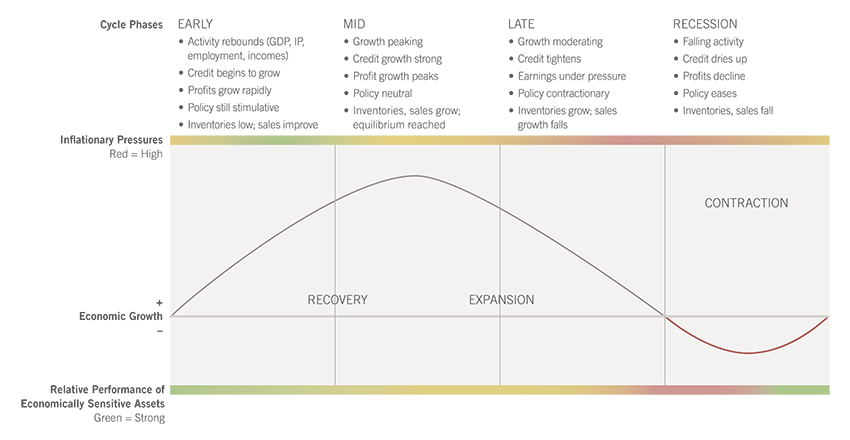

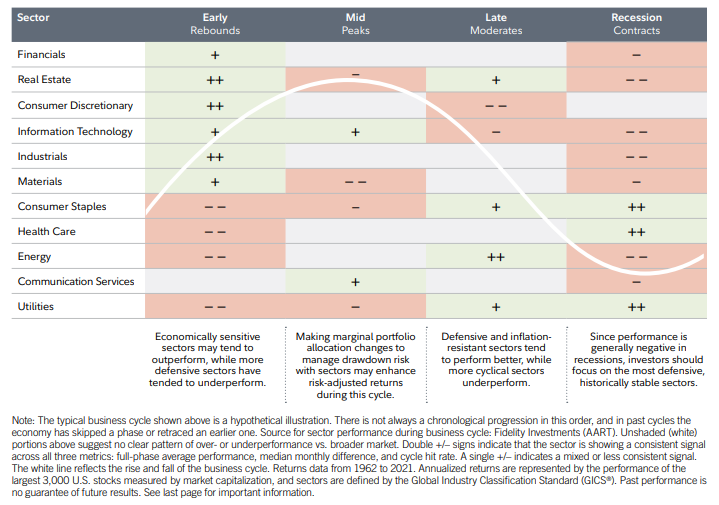

### XLE: Energía
- Altamente dependiente de los precios del petróleo y gas natural. 
- Factores geopolíticos
- Cambios en la política energética 
- Avances en tecnologías alternativas

### XLB: Materiales
- Influenciado por los ciclos económicos globales, ya que incluye empresas de minería y químicos. 
- Los precios de las materias primas
- Políticas comerciales

### XLI: Industriales
- Dependiente de la actividad económica global y nacional. 
- Políticas comerciales
- Ciclos de inventario
- Gastos de capital

### XLK: Tecnología
- Impulsado por la innovación, la 
- Adopción de nuevas tecnologías
- Demanda de electrónica de consumo y servicios digitales. 
- Cambios en las políticas de privacidad
- Tensiones comerciales

### XLF: Financiero
- Tasas de interés
- Políticas monetarias
- Salud económica global
- Fluctuaciones en los mercados de crédito
- Condiciones de inversión

### XLP: Consumo Básico
- Considerado un sector defensivo, se ve menos afectado por las fluctuaciones económicas porque incluye productos de necesidad básica. 
- Variaciones en los precios de las materias primas

### XLY: Consumo Discrecional
- Estado de la economía
- Confianza del consumidor
- Empleo
- Ingresos disponibles de los consumidores

### XLV: Salud
- Movido por la innovación en tratamientos médicos
- Cambios en la regulación gubernamental
- Demografía, especialmente el envejecimiento de la población

### XLU: Utilidades
- Otro sector defensivo que es menos sensible a los cambios económicos. 
- Afectado por las regulaciones gubernamentales
- Políticas sobre tarifas y sostenibilidad

### IYR: Bienes Raíces
- Altamente sensible a las tasas de interés. 
- Ciclos económicos
- Políticas fiscales
- Demanda de espacio tanto residencial como comercial


### VOX: Servicios de Comunicación
- Sensible a cambios en las tendencias de consumo
- Avances tecnológicos
- Regulaciones gubernamentales
- Popularidad del streaming y servicios de telecomunicaciones


# Análisis de Factores para Trading Algorítmico de ETFs

## 1. Factores Macroeconómicos Principales

### 1.1 Tasas de Interés
- **Impacto Primario**: XLF, IYR
- **Impacto Secundario**: XLU, XLP
- **Implementación**:
  - Monitoreo de decisiones de la FED
  - Seguimiento de curvas de rendimiento
  - Análisis de diferenciales de tasas
  - Indicadores: Fed Funds Rate, Treasury Yields, LIBOR

### 1.2 Ciclos Económicos
- **Impacto Primario**: XLB, XLI, XLY
- **Impacto Secundario**: XLF, IYR
- **Implementación**:
  - GDP growth rate tracking
  - Índices de producción industrial
  - Indicadores adelantados (Leading Economic Indicators)
  - Análisis de ciclos de inventario

## 2. Factores Sectoriales Específicos

### 2.1 Innovación y Tecnología
- **Sectores Principales**: XLK, XLV
- **Métricas Clave**:
  - Gasto en I+D
  - Patentes registradas
  - Adopción de nuevas tecnologías
  - Tendencias en cloud computing y AI

### 2.2 Comportamiento del Consumidor
- **Sectores Afectados**: XLP, XLY, VOX
- **Indicadores**:
  - Índice de confianza del consumidor
  - Ventas minoristas
  - Tendencias de e-commerce
  - Datos de empleo y salarios

## 3. Factores de Riesgo y Volatilidad

### 3.1 Riesgos Sistémicos
- **Indicadores**:
  - VIX (Índice de Volatilidad)
  - Credit Default Swaps
  - Ted Spread
  - Índices de estrés financiero

### 3.2 Riesgos Sectoriales
- **Métricas**:
  - Volatilidad sectorial relativa
  - Correlaciones intersectoriales
  - Betas sectoriales

## 4. Implementación Algorítmica

### 4.1 Priorización de Factores
1. **Factores de Alta Frecuencia**:
   - Tasas de interés
   - Precios de materias primas
   - Indicadores de mercado en tiempo real

2. **Factores de Media Frecuencia**:
   - Datos económicos mensuales
   - Reportes de empleo
   - Indicadores de sentimiento

3. **Factores de Baja Frecuencia**:
   - Cambios regulatorios
   - Tendencias demográficas
   - Ciclos económicos largos

### 4.2 Ponderación de Señales
- **Modelo Base**:
  ```
  Score = Σ(Wi * Fi)
  Donde:
  Wi = Peso del factor i
  Fi = Valor normalizado del factor i
  ```

- **Ajustes Dinámicos**:
  - Pesos variables según régimen de mercado
  - Calibración por volatilidad
  - Ajustes estacionales

### 4.3 Filtros y Señales

#### Señales Primarias:
1. **Macroeconómicas**:
   - Cambios en tasas de interés
   - Sorpresas en datos económicos
   - Movimientos en divisas

2. **Sectoriales**:
   - Momentum relativo
   - Rotación sectorial
   - Flujos de capital

#### Filtros de Riesgo:
1. **Sistémicos**:
   - Niveles de VIX
   - Spread de crédito
   - Liquidez del mercado

2. **Específicos**:
   - Volatilidad sectorial
   - Exposición a factores de riesgo
   - Correlaciones dinámicas

## 5. Recomendaciones de Implementación

### 5.1 Arquitectura del Sistema
1. **Módulo de Datos**:
   - Integración de fuentes múltiples
   - Normalización y limpieza
   - Almacenamiento eficiente

2. **Módulo de Análisis**:
   - Procesamiento de señales
   - Cálculo de indicadores
   - Generación de scores

3. **Módulo de Ejecución**:
   - Gestión de órdenes
   - Control de riesgo
   - Monitoreo de posiciones

### 5.2 Consideraciones Técnicas
1. **Frecuencia de Trading**:
   - Adaptar a la liquidez del ETF
   - Considerar costos de transacción
   - Optimizar señales por timeframe

2. **Gestión de Riesgos**:
   - Límites de posición
   - Stop-loss dinámicos
   - Diversificación efectiva

3. **Optimización**:
   - Backtesting robusto
   - Validación fuera de muestra
   - Análisis de sensibilidad

## 6. Métricas de Evaluación

### 6.1 Rendimiento
- Sharpe Ratio
- Sortino Ratio
- Information Ratio
- Maximum Drawdown

### 6.2 Riesgo
- Value at Risk (VaR)
- Expected Shortfall
- Beta ajustado
- Tracking Error

### 6.3 Operativas
- Win Rate
- Profit Factor
- Recovery Factor
- Calmar Ratio

## 7. Conclusiones

Los factores más relevantes para implementar en el modelo varían según el horizonte temporal:

**Corto Plazo**:
- Tasas de interés
- Momentum sectorial
- Volatilidad del mercado
- Flujos de capital

**Medio Plazo**:
- Ciclos económicos
- Tendencias sectoriales
- Políticas monetarias
- Sentiment del mercado

**Largo Plazo**:
- Cambios regulatorios
- Tendencias demográficas
- Innovación tecnológica
- Cambios estructurales

La implementación exitosa requiere un equilibrio entre:
1. Robustez del sistema
2. Adaptabilidad a cambios de mercado
3. Gestión eficiente del riesgo
4. Optimización de costos operativos

In [16]:
import pandas_datareader.data as web

(web.DataReader(["CPIAUCSL"], 'fred', 1980, 2025)
        .ffill()
        #.resample('M')
        #.resample('W-WED')
        .resample('W')
        .last()
        .dropna())


,CPIAUCSL
DATE,
1980-01-06,78.000
1980-02-03,79.000
1980-03-02,80.100
1980-04-06,80.900
1980-05-04,81.700
...,...
2024-07-07,313.534
2024-08-04,314.121
2024-09-01,314.686


/tmp/ipykernel_492237/1667408874.py:65: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


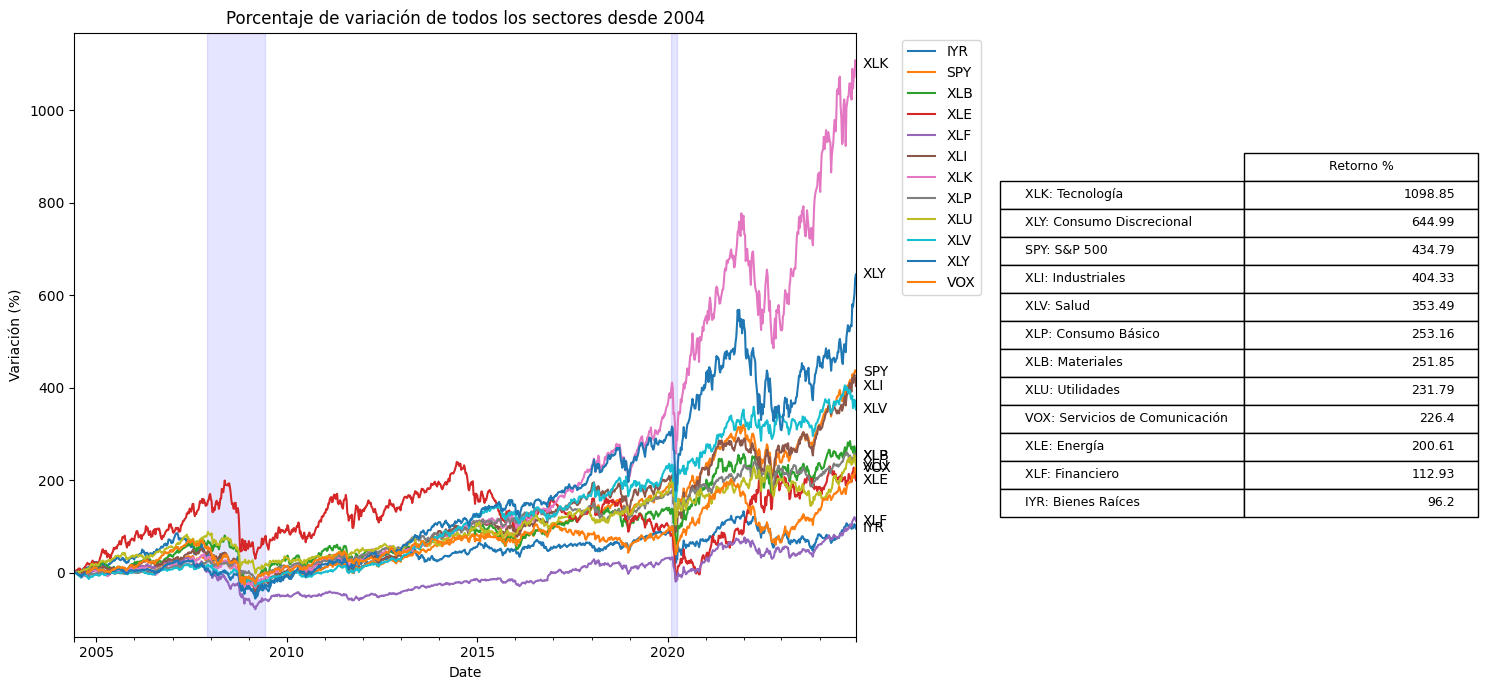

In [17]:
# Crear figura para todos los tickers
# Crear figura con dos subplots
fig = plt.figure(figsize=(15,7))
gs = fig.add_gridspec(1, 2, width_ratios=[4, 1])
ax = fig.add_subplot(gs[0])
ax_table = fig.add_subplot(gs[1])

# Lista de todos los tickers únicos
tickers = df.index.get_level_values('Ticker').unique()

# Diccionario para almacenar los retornos
retornos = {}

# Graficar cada ticker
for ticker in tickers:
    datos = df.loc[pd.IndexSlice[:,ticker],"Close"].copy()
    datos = datos.reset_index(level='Ticker', drop=True)
    datos = datos.resample('W').last()
    
    # Normalizar los precios como porcentaje de variación desde el inicio
    primer_valor = datos.iloc[0]
    datos = (datos / primer_valor - 1) * 100
    datos.plot(ax=ax, label=ticker)
    
    # Guardar el retorno total
    retornos[ticker] = datos.iloc[-1]
    
    # Añadir etiqueta al final de la línea
    ultimo_valor = datos.iloc[-1]
    ax.annotate(ticker, 
                xy=(datos.index[-1], ultimo_valor),
                xytext=(5, 0), 
                textcoords='offset points',
                va='center')

# Configurar gráfico principal   
ax.set_title("Porcentaje de variación de todos los sectores desde 2004")
ax.set_ylabel("Variación (%)")
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Marcar ciclos
for fecha_inicio, fecha_fin in fechas_ciclos_pico_valle:
    ax.axvspan(fecha_inicio, fecha_fin, color='blue', alpha=0.1)

# Crear tabla de retornos
tabla_datos = pd.DataFrame.from_dict(retornos, orient='index', columns=['Retorno %'])
tabla_datos = tabla_datos.sort_values('Retorno %', ascending=False)
tabla_datos['Retorno %'] = tabla_datos['Retorno %'].round(2)

# Obtener nombres del dataframe original
nombres = df.groupby('Ticker')['Nombre'].first()
tabla_datos.index = tabla_datos.index.map(nombres)

ax_table.axis('off')
tabla = ax_table.table(cellText=tabla_datos.values,
                      rowLabels=tabla_datos.index,
                      colLabels=['Retorno %'],
                      loc='center',
                      cellLoc='right')
tabla.auto_set_font_size(False)
tabla.set_fontsize(9)
tabla.scale(1.2, 1.5)

plt.tight_layout()
fig.show()


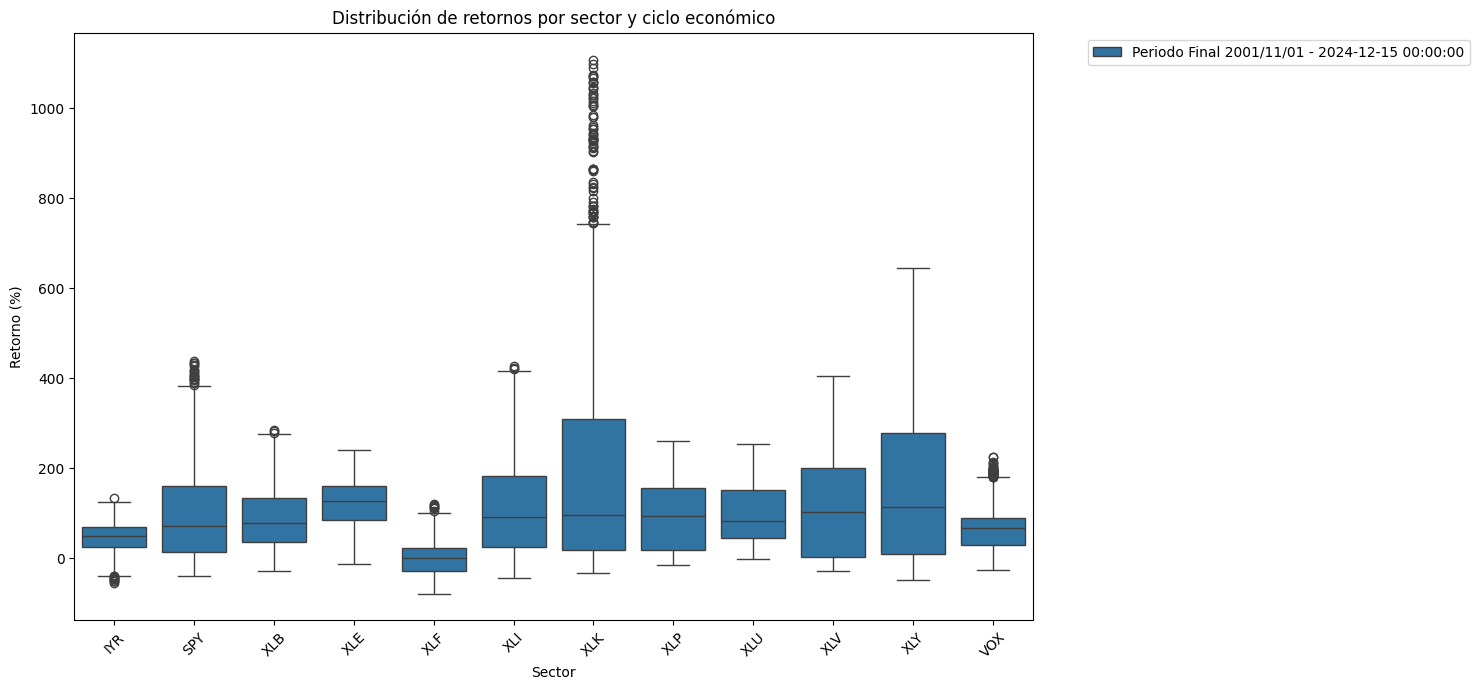

In [18]:
# Calcular el aumento porcentual para cada ticker
df_pct = df.copy()
for ticker in df.index.get_level_values('Ticker').unique():
    ticker_data = df.loc[pd.IndexSlice[:, ticker], 'Close']
    primer_valor = ticker_data.iloc[0]
    df_pct.loc[pd.IndexSlice[:, ticker], 'Close'] = (ticker_data / primer_valor - 1) * 100

# Crear boxplot
plt.figure(figsize=(15,7))
sns.boxplot(data=df_pct.reset_index(), x='Ticker', y='Close', hue='Ciclo')

# Rotar etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=45)

# Ajustar título y etiquetas
plt.title('Distribución de retornos por sector y ciclo económico')
plt.xlabel('Sector')
plt.ylabel('Retorno (%)')

# Ajustar leyenda
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

## XLE: Energía

In [19]:
# Obtener el valor de XLE al inicio de cada ciclo
for fecha_inicio, fecha_fin in fechas_ciclos_pico_valle:
    try:
        fecha_inicio_dt = pd.to_datetime(fecha_inicio)
        valor_xle_inicio = df.loc[pd.IndexSlice[fecha_inicio_dt:fecha_inicio_dt+pd.Timedelta(days=7),'XLE'],"Close"].iloc[0]
        fecha_fin_dt = pd.to_datetime(fecha_fin)
        valor_xle_fin = df.loc[pd.IndexSlice[fecha_fin_dt:fecha_fin_dt+pd.Timedelta(days=7),'XLE'],"Close"].iloc[0]
        print(f"Valor de XLE el {fecha_inicio}: ${valor_xle_inicio:.2f}")
        print(f"Valor de XLE el {fecha_fin}: ${valor_xle_fin:.2f}")
        print("-"*100)
    except:
        print(f"No hay datos disponibles para XLE en {fecha_inicio}")


No hay datos disponibles para XLE en 1990/07/06
No hay datos disponibles para XLE en 2001/03/01
Valor de XLE el 2007/12/01: $73.47
Valor de XLE el 2009/06/01: $52.11
----------------------------------------------------------------------------------------------------
Valor de XLE el 2020/02/01: $53.44
Valor de XLE el 2020/04/01: $29.83
----------------------------------------------------------------------------------------------------


In [20]:
def analisis_rendimiento_ciclos(df, ticker):
    print(f"\nAnálisis de rendimiento para {ticker} en cada ciclo:\n")
    
    for fecha_inicio, fecha_fin in fechas_ciclos_pico_valle:
        # Obtener precios al inicio y fin del ciclo
        try:
            fecha_inicio_dt = pd.to_datetime(fecha_inicio)
            fecha_fin_dt = pd.to_datetime(fecha_fin)
            precio_inicio = df.loc[pd.IndexSlice[fecha_inicio_dt:fecha_inicio_dt+pd.Timedelta(days=7),ticker],"Close"].iloc[0]
            precio_fin = df.loc[pd.IndexSlice[fecha_fin_dt:fecha_fin_dt+pd.Timedelta(days=7),ticker],"Close"].iloc[0]
        except:
            print(f"No hay datos disponibles para {ticker} en {fecha_inicio} o {fecha_fin}")
            continue
        
        # precio_inicio = df.loc[pd.IndexSlice[fecha_inicio:fecha_inicio,ticker],"Close"].iloc[0]
        # precio_fin = df.loc[pd.IndexSlice[fecha_fin:fecha_fin,ticker],"Close"].iloc[0]
        
        # Calcular cambios
        cambio_absoluto = precio_fin - precio_inicio
        cambio_porcentual = (precio_fin/precio_inicio - 1) * 100
        
        print(f"Ciclo {fecha_inicio} - {fecha_fin}:")
        print(f"Cambio absoluto: ${cambio_absoluto:.2f}")
        print(f"Cambio porcentual: {cambio_porcentual:.1f}%\n")

analisis_rendimiento_ciclos(df, "XLE")



Análisis de rendimiento para XLE en cada ciclo:

No hay datos disponibles para XLE en 1990/07/06 o 1991/03/01
No hay datos disponibles para XLE en 2001/03/01 o 2001/11/01
Ciclo 2007/12/01 - 2009/06/01:
Cambio absoluto: $-21.36
Cambio porcentual: -29.1%

Ciclo 2020/02/01 - 2020/04/01:
Cambio absoluto: $-23.61
Cambio porcentual: -44.2%



In [23]:
tickers = ["XLE", "XLB", "XLI", "XLK", "XLF", "XLP", "XLY", "XLV", "XLU", "IYR", "VOX", "SPY"]

/tmp/ipykernel_492237/2988362073.py:94: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_492237/2988362073.py:94: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_492237/2988362073.py:94: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_492237/2988362073.py:94: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_492237/2988362073.py:94: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_492237/2988362073.py:94: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_492237/2988362073.py:94: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_492237/2988362073.py:94: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be sho

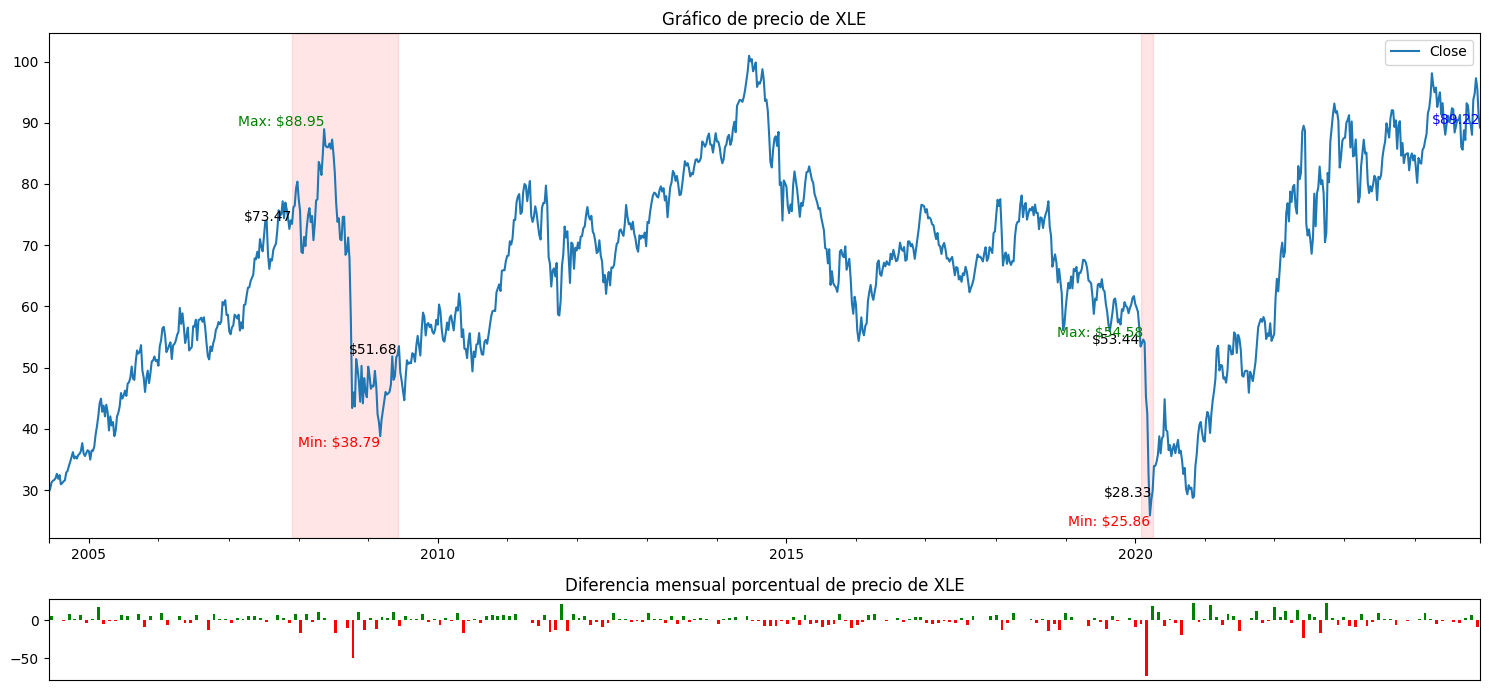

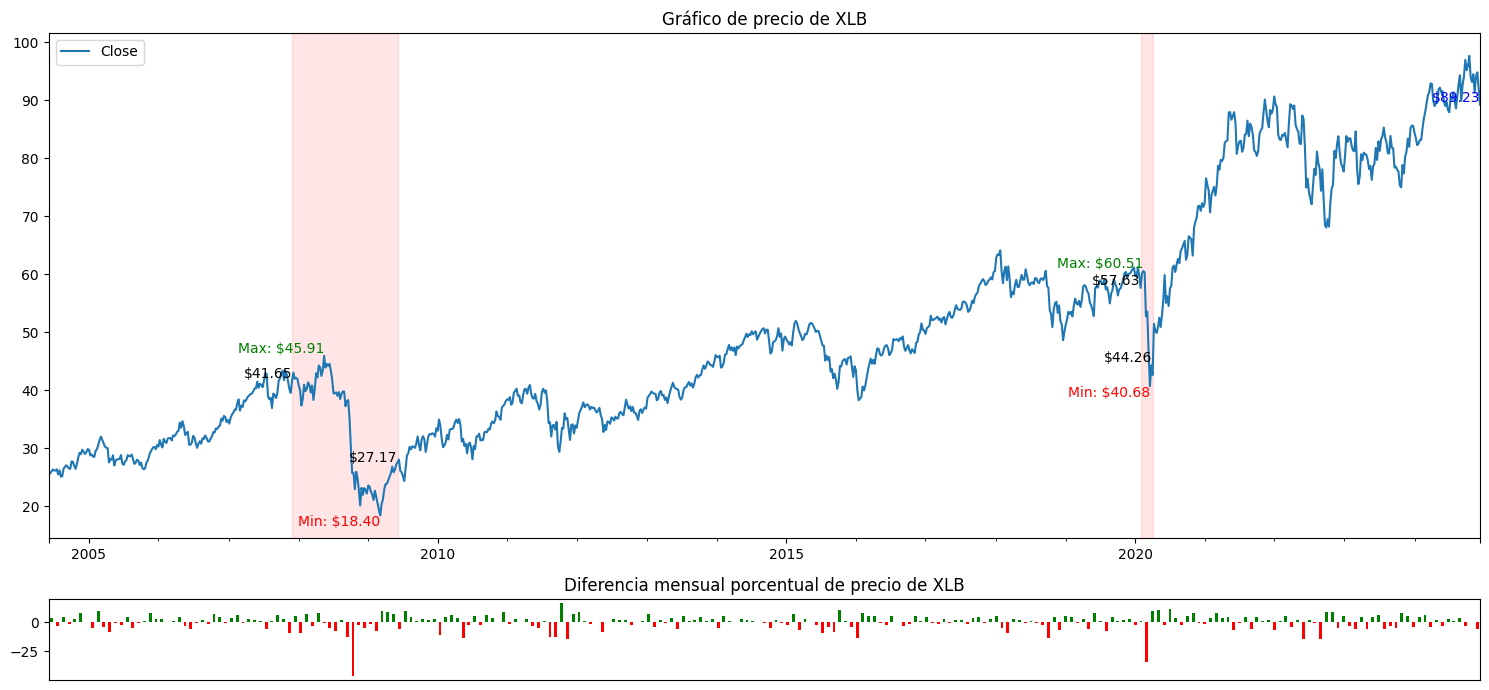

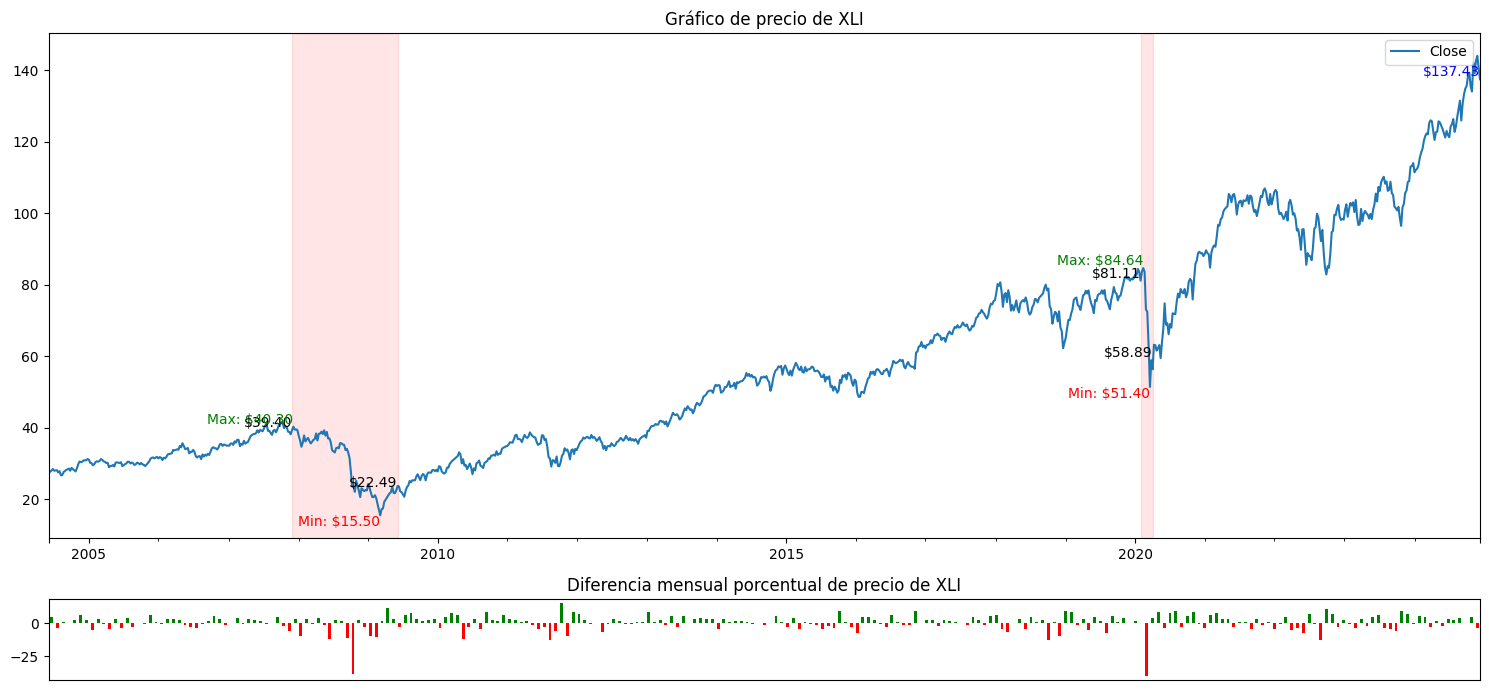

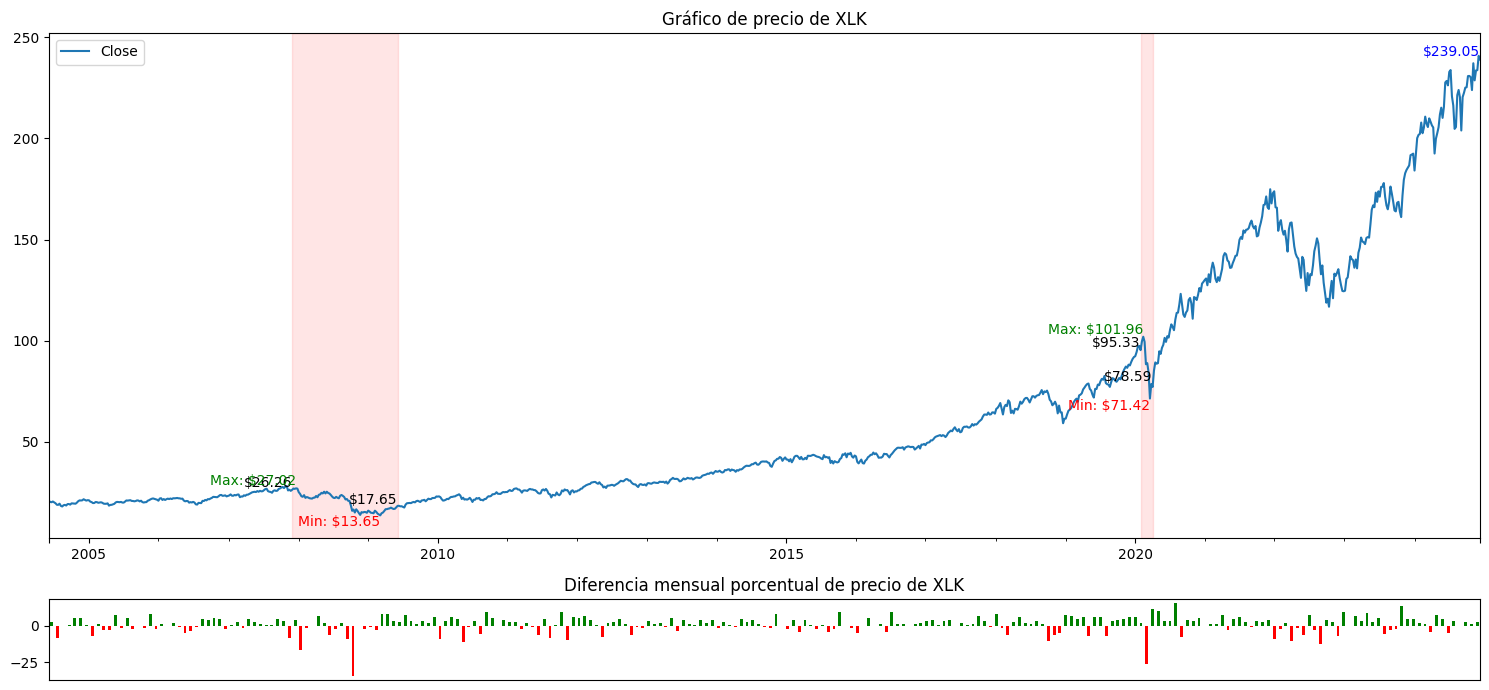

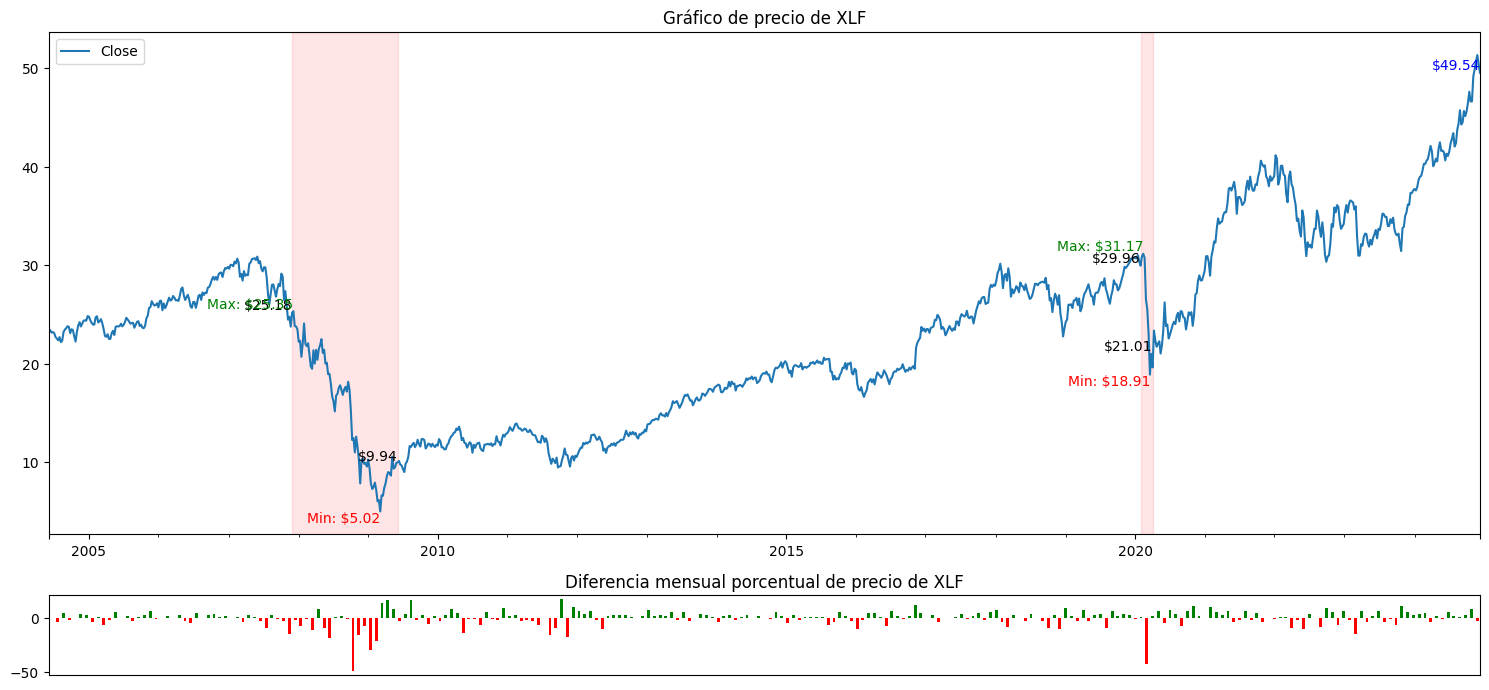

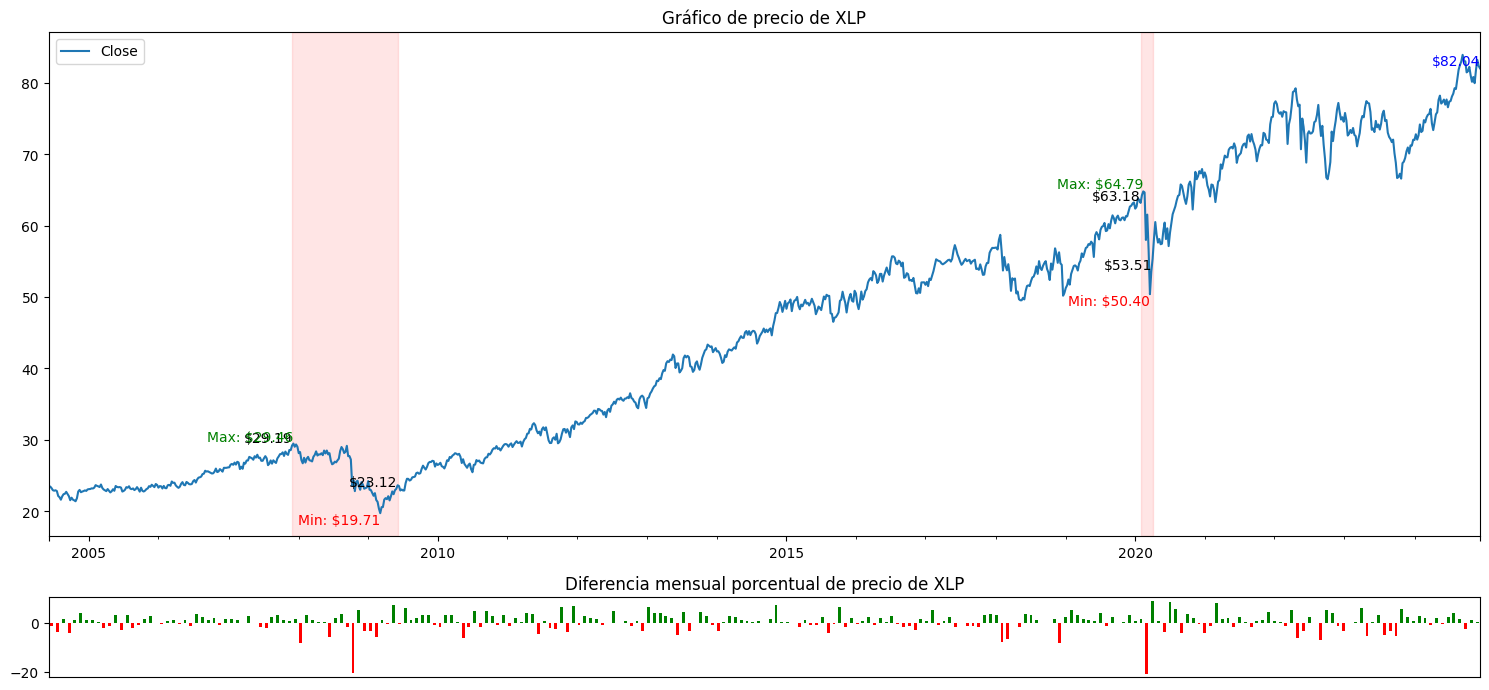

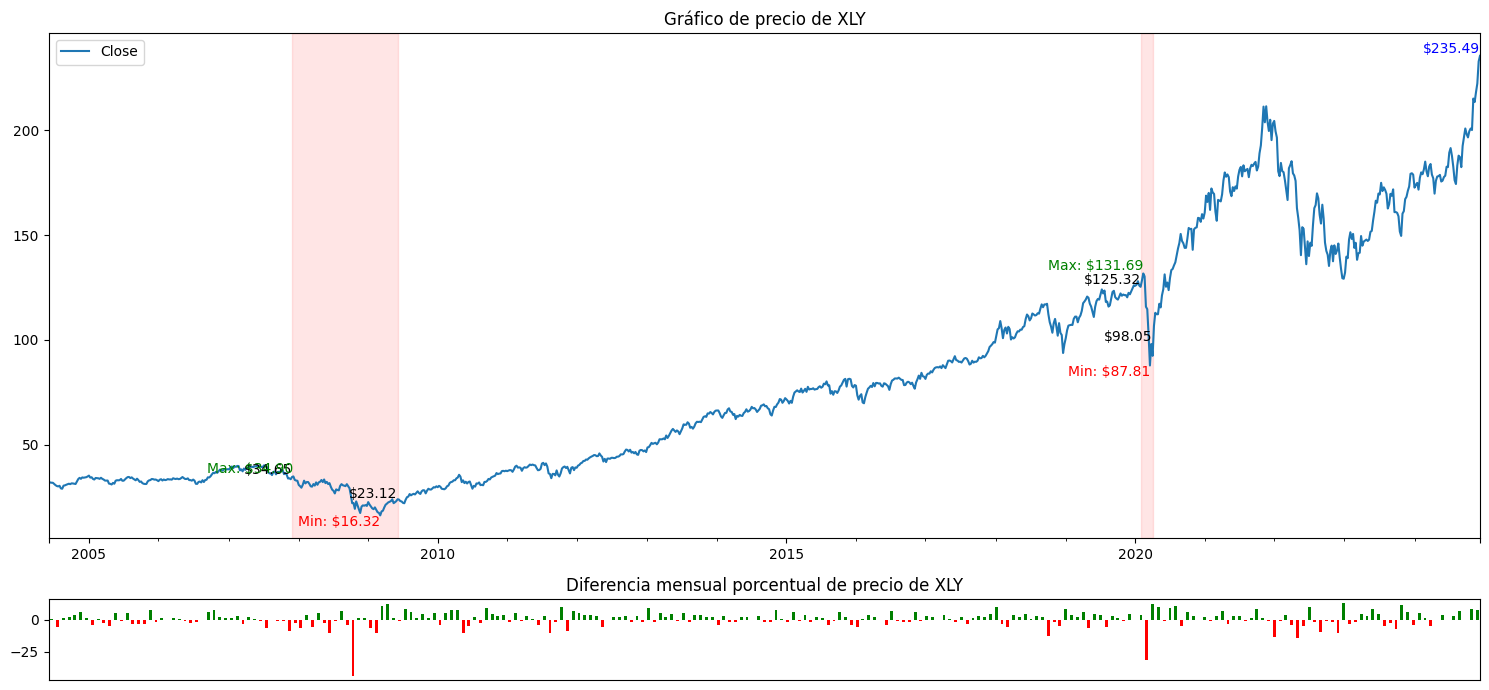

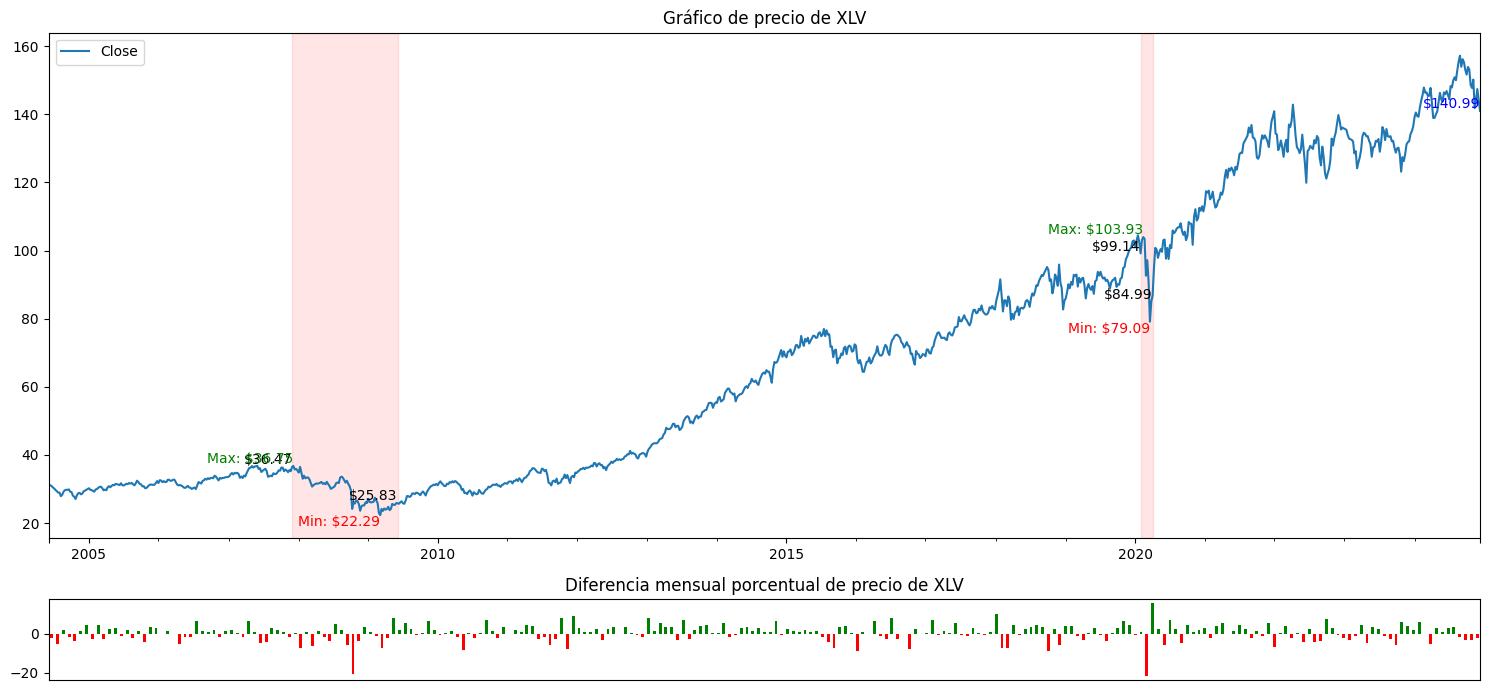

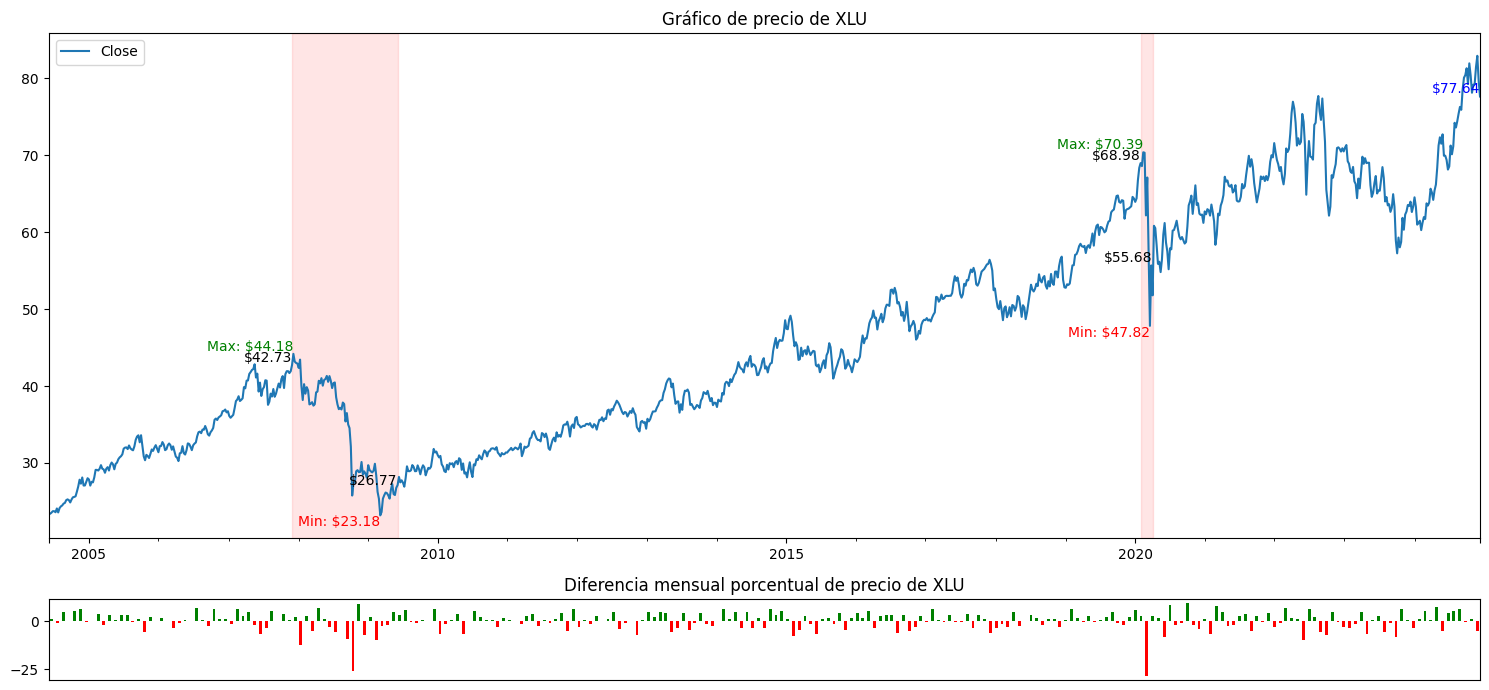

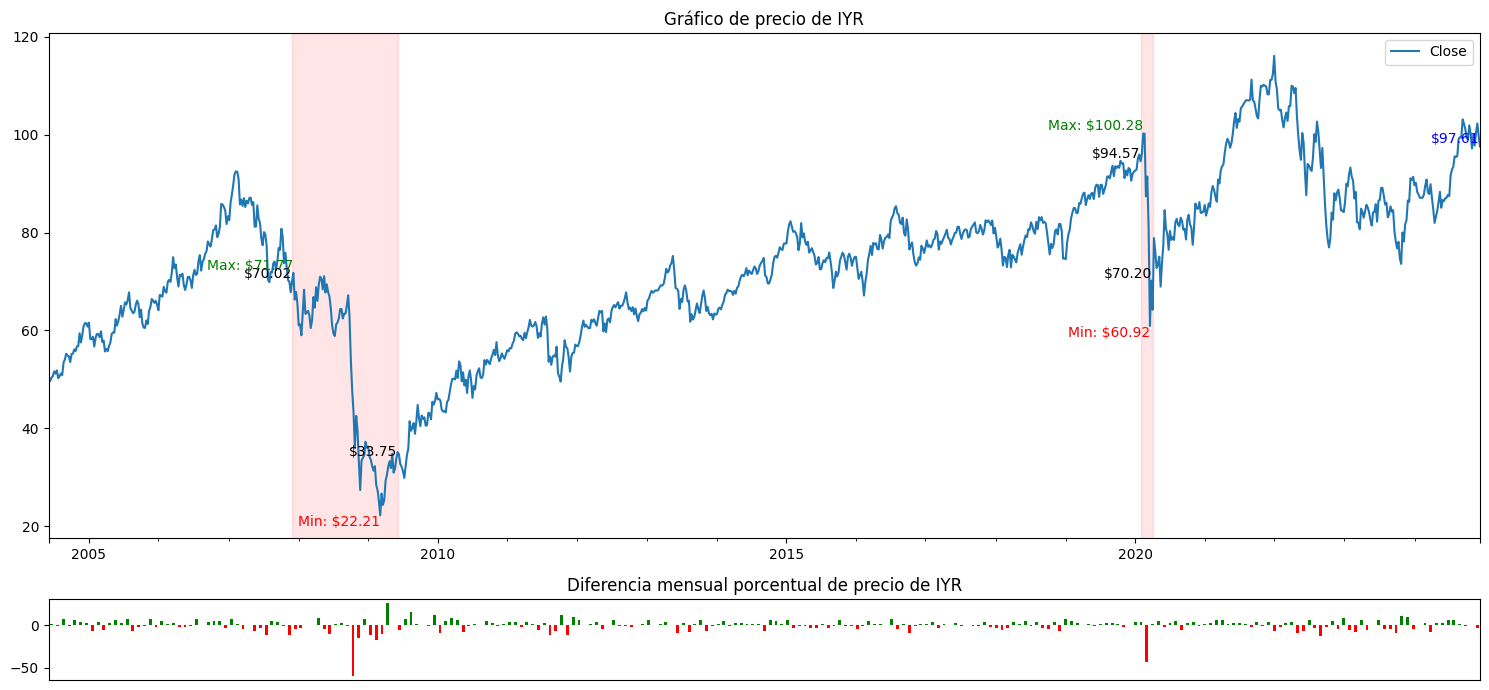

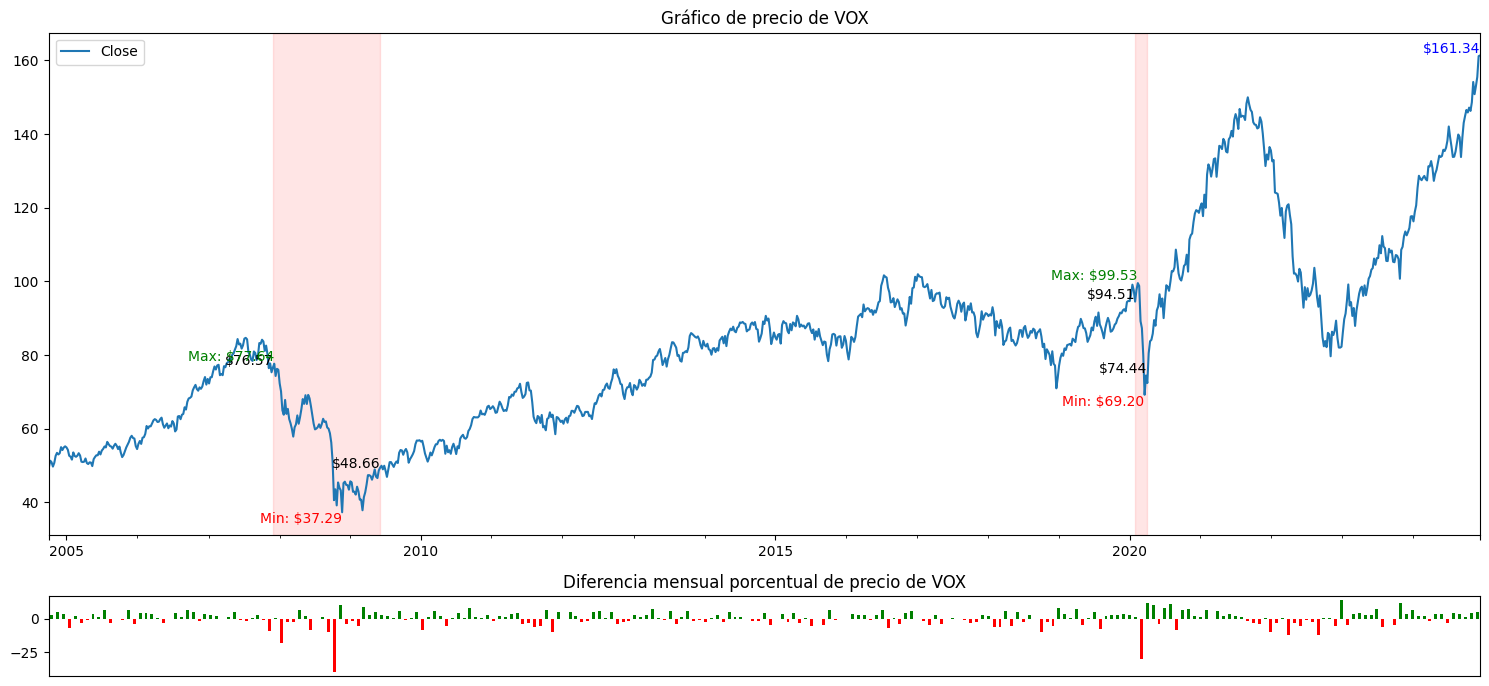

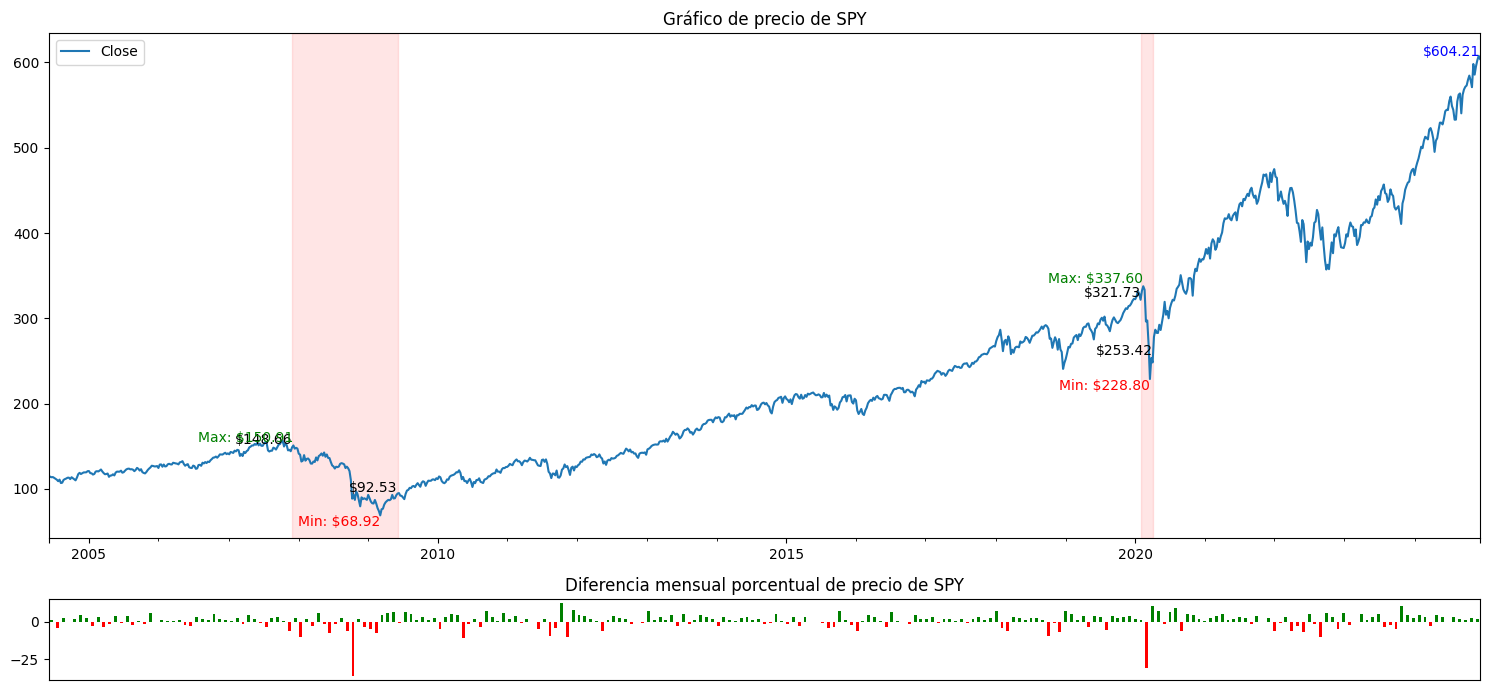

In [24]:
def grafico_precio(df, ticker, mostrar_porcentaje=False):
    fig = plt.figure(figsize=(15,7))
    gs = fig.add_gridspec(5, 1)
    ax = [None, None]
    ax[0] = fig.add_subplot(gs[0:4, 0])
    ax[1] = fig.add_subplot(gs[4, 0])
    
    # Ajustar las proporciones relativas de los subplots
    
    
    # Eliminar los ticks de la figura principal
    # fig.tick_params(axis='both', which='both', length=0, labelbottom=False, labelleft=False)
    
    # Obtener los datos de precio
    datos = df.loc[pd.IndexSlice[:,ticker],"Close"].reset_index(level=1)
    
    if mostrar_porcentaje:
        # Calcular porcentaje respecto al primer valor
        primer_valor = datos["Close"].iloc[0]
        datos["Close"] = (datos["Close"] / primer_valor - 1) * 100
        datos.plot(ax=ax[0])
        ax[0].set_title(f"Porcentaje de variación de {ticker} respecto al inicio")
        ax[0].set_ylabel("Variación (%)")
    else:
        datos.plot(ax=ax[0])
        ax[0].set_title(f"Gráfico de precio de {ticker}")
    
    # Mostrar último precio
    ultimo_precio = datos["Close"].iloc[-1]
    if mostrar_porcentaje:
        ax[0].text(datos.index[-1], ultimo_precio, f'{ultimo_precio:.1f}%', 
                verticalalignment='bottom', horizontalalignment='right', color='blue')
    else:
        ax[0].text(datos.index[-1], ultimo_precio, f'${ultimo_precio:.2f}', 
                verticalalignment='bottom', horizontalalignment='right', color='blue')
    
    for fecha_inicio, fecha_fin in fechas_ciclos_pico_valle:
        ax[0].axvspan(fecha_inicio, fecha_fin, color='red', alpha=0.1)
        try:
            fecha_inicio_dt = pd.to_datetime(fecha_inicio)
            fecha_fin_dt = pd.to_datetime(fecha_fin)
            
            # Obtener datos del ciclo
            datos_ciclo = df.loc[pd.IndexSlice[fecha_inicio_dt:fecha_fin_dt,ticker],"Close"]
            valor_inicio = datos_ciclo.iloc[0]
            valor_fin = datos_ciclo.iloc[-1]
            valor_max = datos_ciclo.max()
            valor_min = datos_ciclo.min()
            
            # Encontrar fechas de máximo y mínimo
            fecha_max = datos_ciclo.idxmax()[0]
            fecha_min = datos_ciclo.idxmin()[0]
            
            if mostrar_porcentaje:
                valor_inicio = (valor_inicio/primer_valor - 1) * 100
                valor_fin = (valor_fin/primer_valor - 1) * 100
                valor_max = (valor_max/primer_valor - 1) * 100
                valor_min = (valor_min/primer_valor - 1) * 100
                
                ax[0].text(fecha_inicio, valor_inicio, f'{valor_inicio:.1f}%', verticalalignment='bottom', horizontalalignment='right')
                ax[0].text(fecha_fin, valor_fin, f'{valor_fin:.1f}%', verticalalignment='bottom', horizontalalignment='right')
                ax[0].text(fecha_max, valor_max, f'Max: {valor_max:.1f}%', verticalalignment='bottom', horizontalalignment='right', color='green')
                ax[0].text(fecha_min, valor_min, f'Min: {valor_min:.1f}%', verticalalignment='top', horizontalalignment='right', color='red')
            else:
                ax[0].text(fecha_inicio, valor_inicio, f'${valor_inicio:.2f}', verticalalignment='bottom', horizontalalignment='right')
                ax[0].text(fecha_fin, valor_fin, f'${valor_fin:.2f}', verticalalignment='bottom', horizontalalignment='right')
                ax[0].text(fecha_max, valor_max, f'Max: ${valor_max:.2f}', verticalalignment='bottom', horizontalalignment='right', color='green')
                ax[0].text(fecha_min, valor_min, f'Min: ${valor_min:.2f}', verticalalignment='top', horizontalalignment='right', color='red')
        except Exception as e:
            continue
    
    ax[0].set_xlabel("")
    # Calcular el diff diario para el volumen de operaciones
    if mostrar_porcentaje:
        datos = df.loc[pd.IndexSlice[:,ticker],"Close"].reset_index(level=1)
        datos_diff = ((datos["Close"].diff()/datos["Close"]).groupby(datos.index.to_period('M')).sum() * 100)
    else:
        datos_diff = ((datos["Close"].diff()/datos["Close"]).groupby(datos.index.to_period('M')).sum() * 100)
    
    # Crear gráfico de barras
    datos_diff.plot(kind='bar', ax=ax[1], color=np.where(datos_diff >= 0, 'g', 'r'))
    ax[1].set_title(f"Diferencia mensual porcentual de precio de {ticker}")
    ax[1].set_xticks([]) # Eliminar ticks del eje x
    ax[1].set_xlabel("")
    
    # Eliminar ticks del eje x del gráfico principal
    # plt.setp(ax[0].get_xticklabels(), visible=False)
    

    # Ajustar espaciado entre subplots
    plt.tight_layout()
    # plt.xticks([])
    # plt.yticks([])
    fig.show()


for ticker in tickers:
    grafico_precio(df, ticker)


C:\Users\javie\AppData\Local\Temp\ipykernel_7468\3247152412.py:27: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


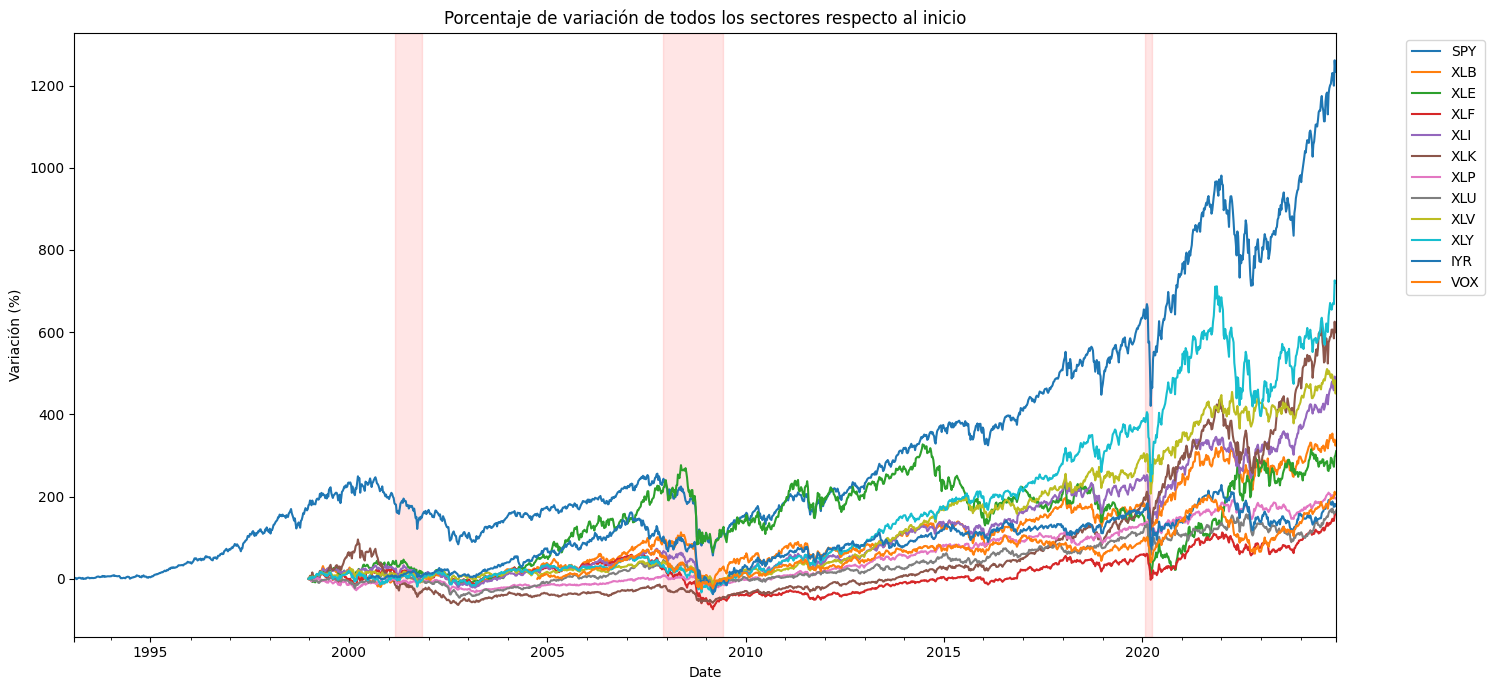

C:\Users\javie\AppData\Local\Temp\ipykernel_7468\4008764370.py:74: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


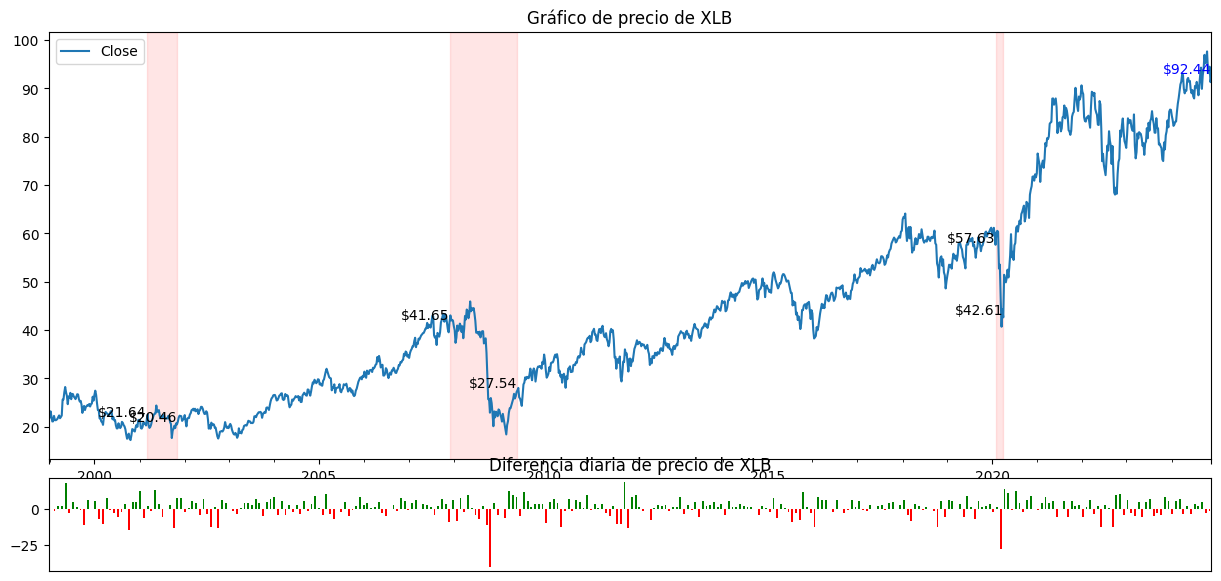

In [165]:
grafico_precio(df, "XLB")


C:\Users\javie\AppData\Local\Temp\ipykernel_7468\4008764370.py:74: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


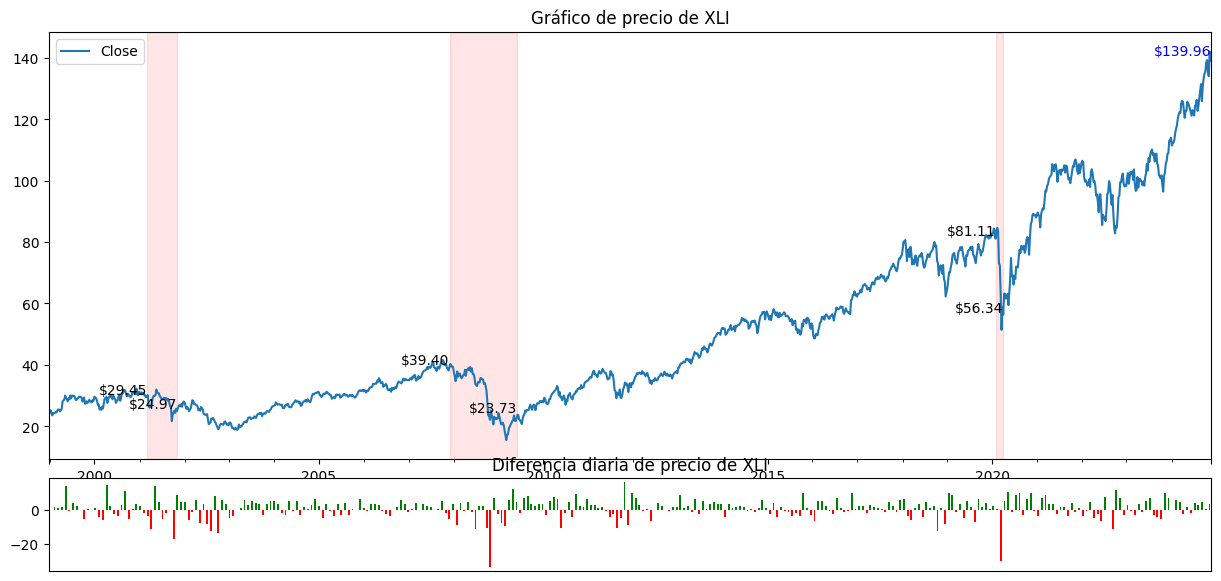

In [166]:
grafico_precio(df, "XLI")


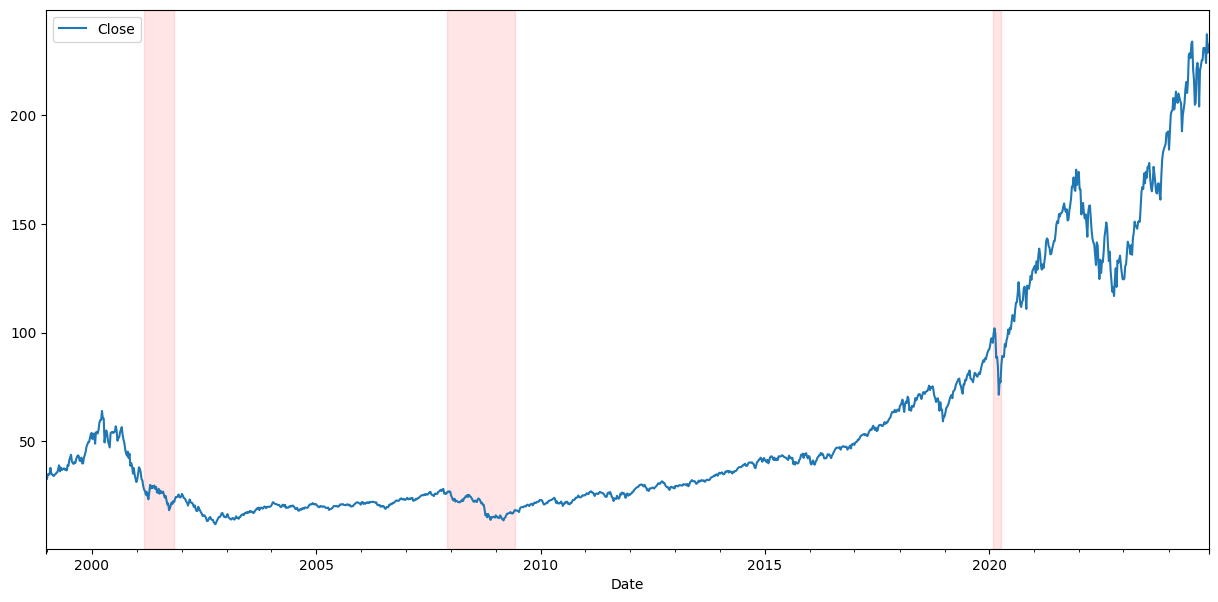

In [33]:
grafico_precio(df, "XLK")


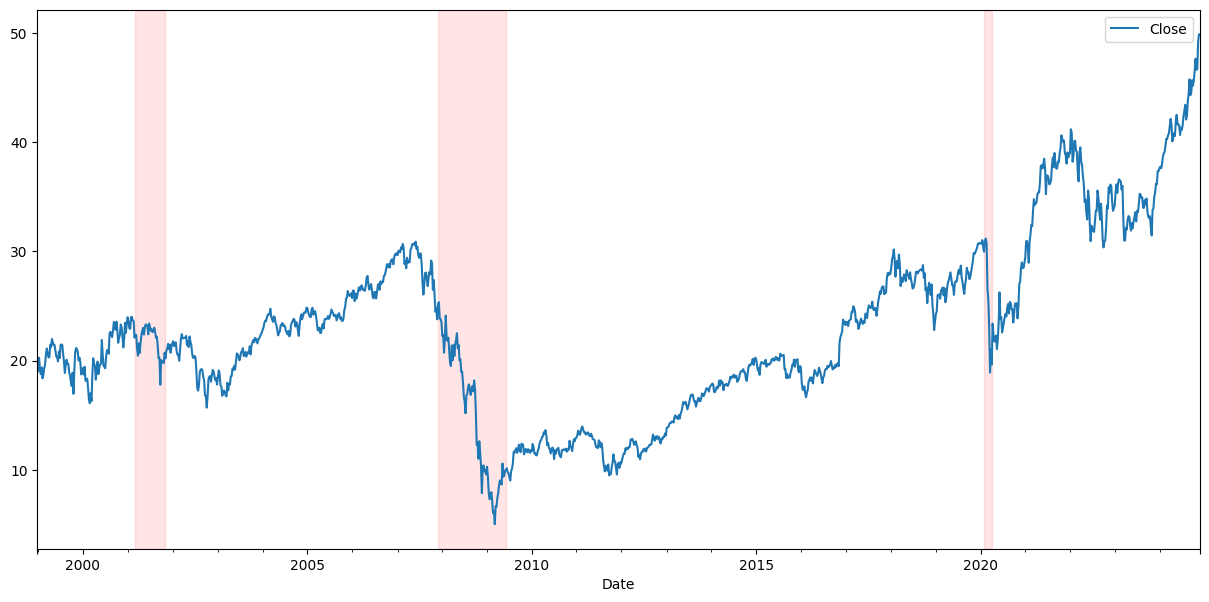

In [34]:
grafico_precio(df, "XLF")


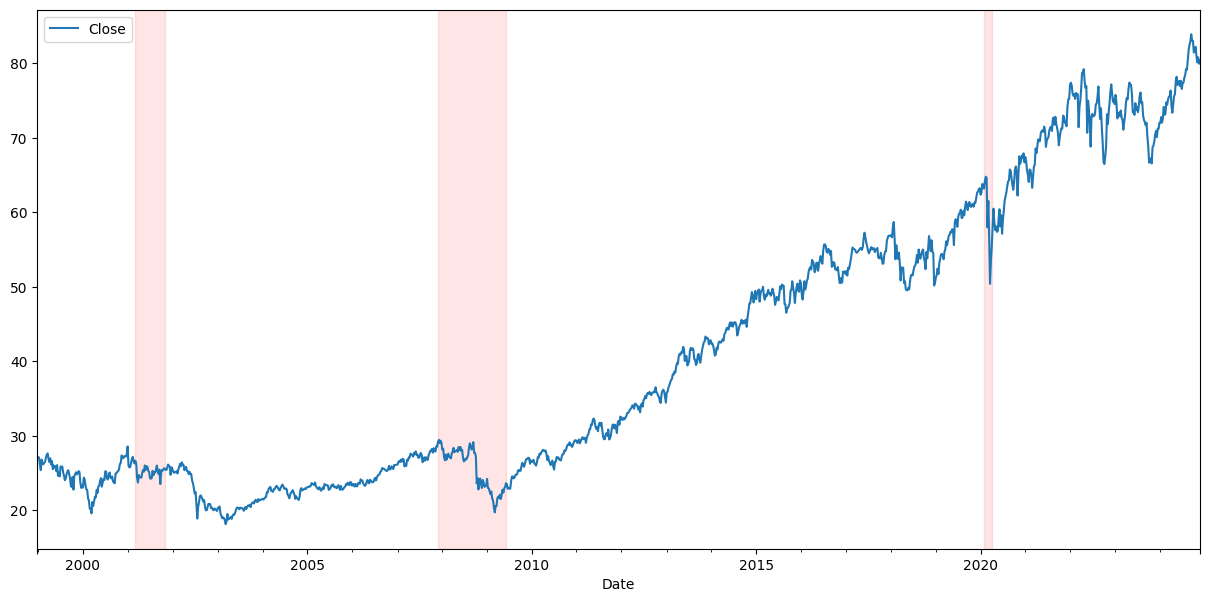

In [35]:
grafico_precio(df, "XLP")


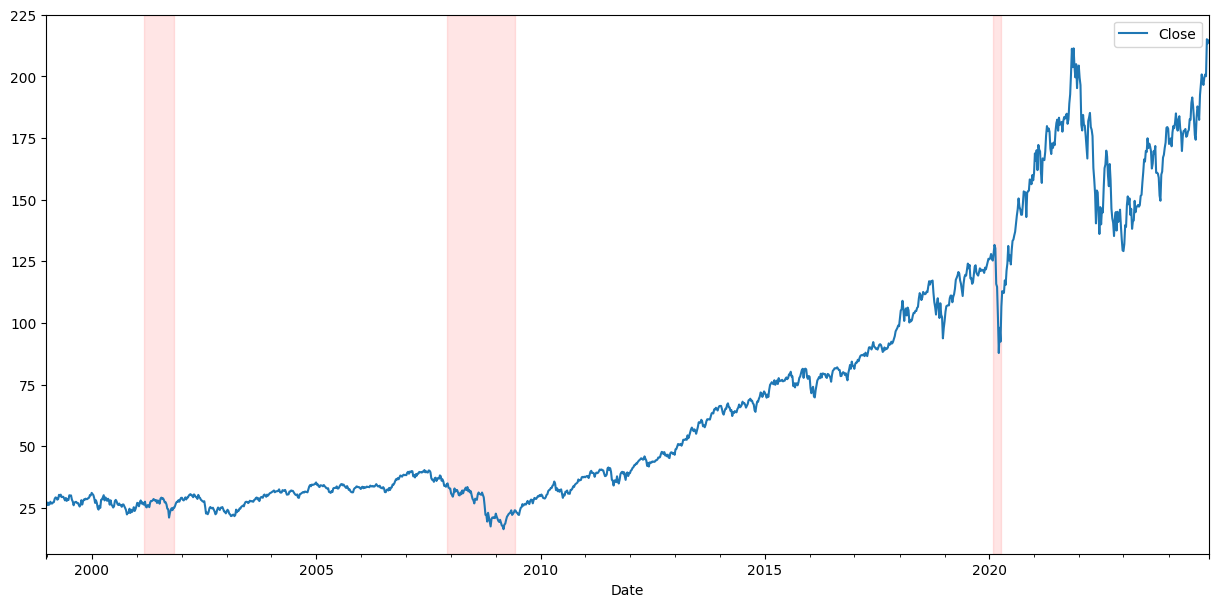

In [36]:
grafico_precio(df, "XLY")


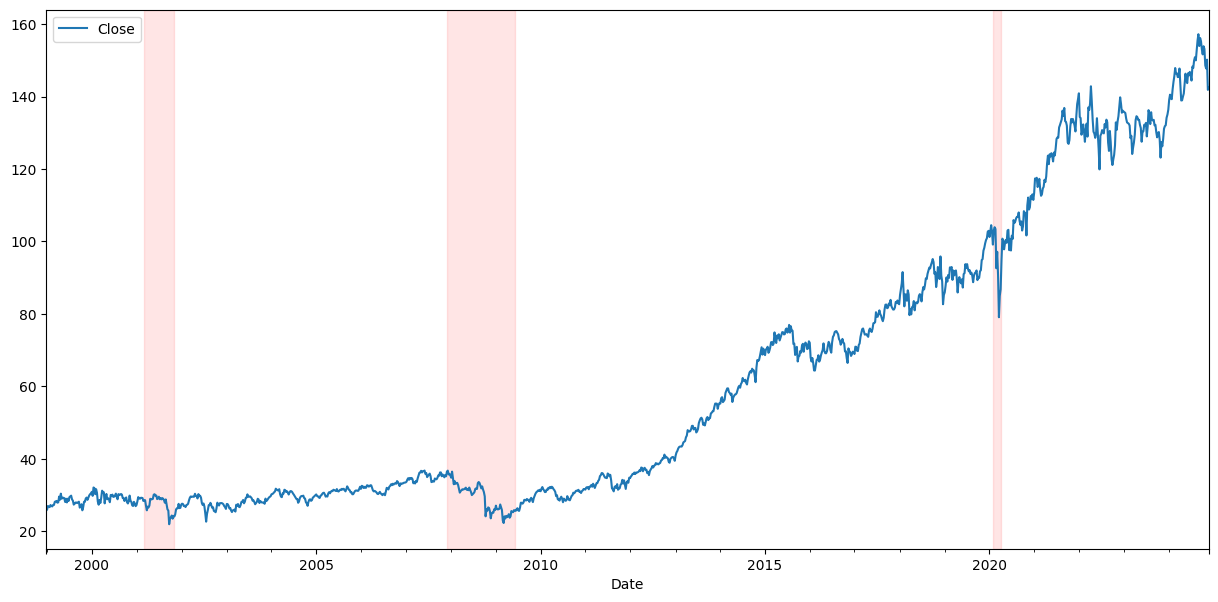

In [37]:
grafico_precio(df, "XLV")


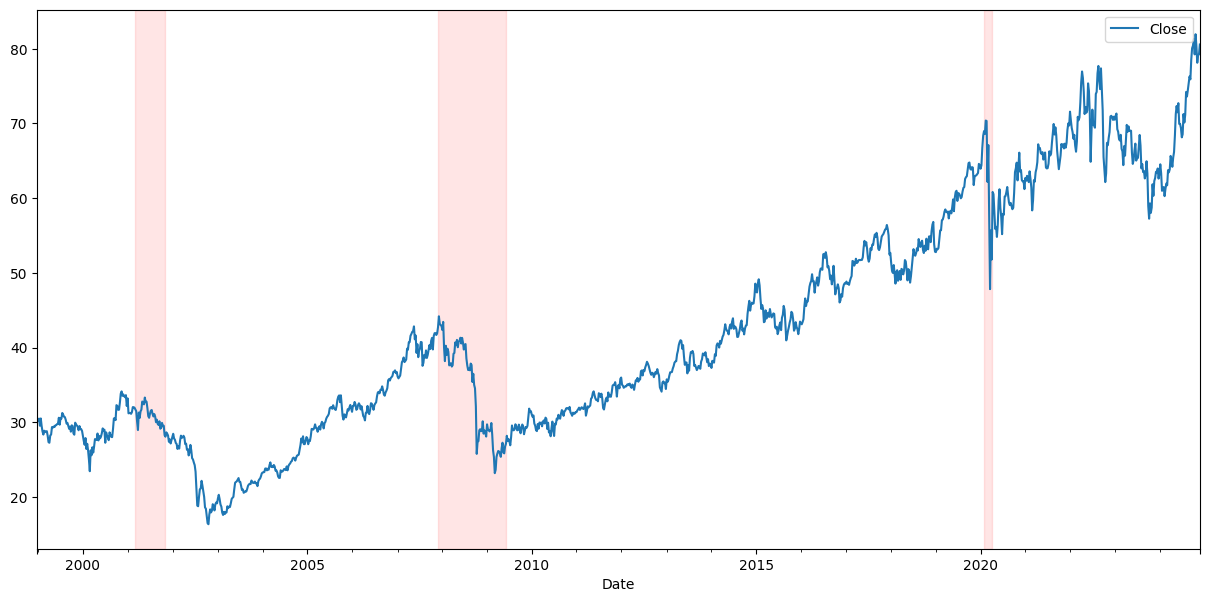

In [38]:
grafico_precio(df, "XLU")


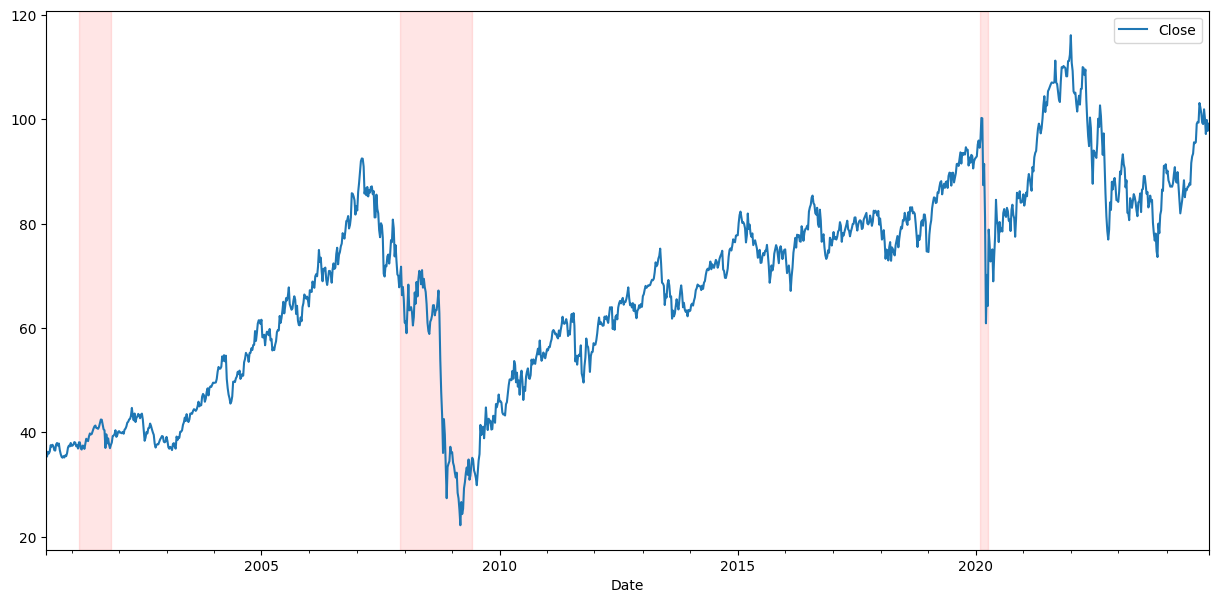

In [39]:
grafico_precio(df, "IYR")



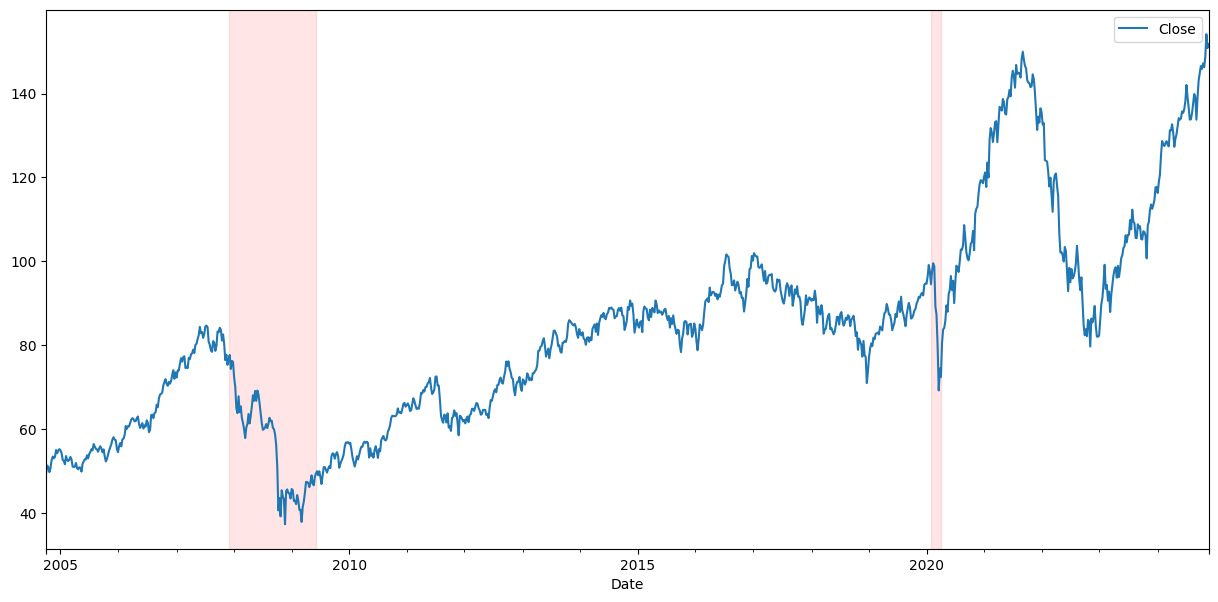

In [40]:
grafico_precio(df, "VOX")


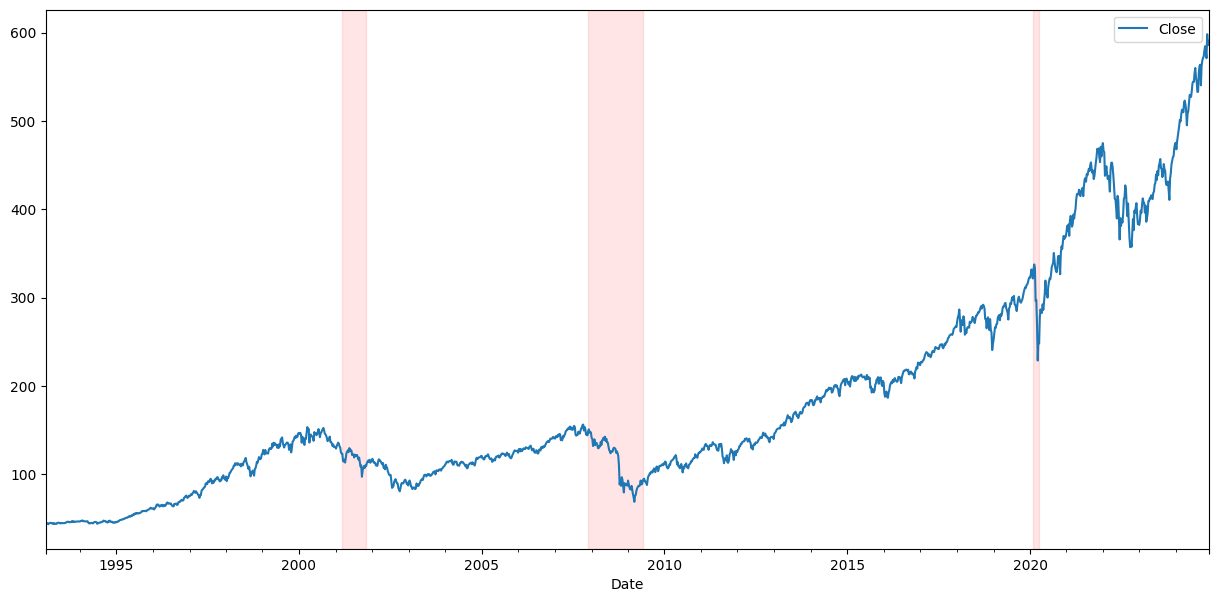

In [41]:
grafico_precio(df, "SPY")